In [1]:
import torch
from torch import nn, optim

from src.data.sine import get_sine_dataloaders
from src.models.transformer import CustomTransformer
from src.training.helicopter import train_helicopter

train_data, valid_data = get_sine_dataloaders(batch_size=24, shuffle=True)

model = CustomTransformer(max_seq_len=512, d_model=1024).to("cuda")

optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

train_helicopter(
    train_data=train_data, 
    valid_data=valid_data, 
    model=model, 
    optimizer=optimizer, 
    scheduler=scheduler, 
    mask_strategy="random zero",
    loss_strategy="complete",
    random_mask_prop=0.3, 
    noise_variance=0.001,
    epochs=20, 
    device="cuda")


c:\Users\maxho\anaconda3\envs\transformer-anomaly-detection\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1:


Validating ...: 100%|██████████| 167/167 [00:40<00:00,  4.14it/s]


Epoch 1/20, Train loss: 0.006384668045615156, Valid loss: 0.002629435921087861
Epoch 2:


Validating ...: 100%|██████████| 167/167 [00:40<00:00,  4.17it/s]


Epoch 2/20, Train loss: 0.0025497777794798214, Valid loss: 0.002387503154575825
Epoch 3:


Validating ...: 100%|██████████| 167/167 [00:40<00:00,  4.16it/s]


Epoch 3/20, Train loss: 0.0023509161420787374, Valid loss: 0.002565594027750194
Epoch 4:


Validating ...: 100%|██████████| 167/167 [00:34<00:00,  4.81it/s]


Epoch 4/20, Train loss: 0.0014786945588576297, Valid loss: 0.0002638593381270766
Epoch 5:


Validating ...: 100%|██████████| 167/167 [00:40<00:00,  4.08it/s]


Epoch 5/20, Train loss: 0.00029547683040921885, Valid loss: 0.00017626586538972334
Epoch 6:


Validating ...: 100%|██████████| 167/167 [00:40<00:00,  4.08it/s]


Epoch 6/20, Train loss: 0.00021051490996032952, Valid loss: 0.00011735094813047908
Epoch 7:


Validating ...: 100%|██████████| 167/167 [00:41<00:00,  4.07it/s]


Epoch 7/20, Train loss: 0.0001798337256691108, Valid loss: 0.0001123300353938248
Epoch 8:


Validating ...: 100%|██████████| 167/167 [00:40<00:00,  4.09it/s]


Epoch 8/20, Train loss: 0.00016268621201937398, Valid loss: 0.00010870350786717608
Epoch 9:


Validating ...: 100%|██████████| 167/167 [00:40<00:00,  4.10it/s]


Epoch 9/20, Train loss: 0.00014727354941035931, Valid loss: 0.00010868132894393056
Epoch 10:


Validating ...: 100%|██████████| 167/167 [00:40<00:00,  4.09it/s]


Epoch 10/20, Train loss: 0.00013842215683156002, Valid loss: 0.00010117010303656571
Epoch 11:


Validating ...: 100%|██████████| 167/167 [00:40<00:00,  4.10it/s]


Epoch 11/20, Train loss: 0.00013101734450707834, Valid loss: 9.329545227228663e-05
Epoch 12:


Validating ...: 100%|██████████| 167/167 [00:34<00:00,  4.83it/s]


Epoch 12/20, Train loss: 0.00012516967457098266, Valid loss: 9.672993203275837e-05
Epoch 13:


Validating ...: 100%|██████████| 167/167 [00:35<00:00,  4.73it/s]


Epoch 13/20, Train loss: 0.00011989055031056827, Valid loss: 9.950145363109186e-05
Epoch 14:


Validating ...: 100%|██████████| 167/167 [00:35<00:00,  4.72it/s]


Epoch 14/20, Train loss: 0.00011472344958844284, Valid loss: 8.895596073125489e-05
Epoch 15:


Validating ...: 100%|██████████| 167/167 [00:35<00:00,  4.77it/s]


Epoch 15/20, Train loss: 0.00011077791663895671, Valid loss: 8.181683102156966e-05
Epoch 16:


Validating ...: 100%|██████████| 167/167 [00:35<00:00,  4.71it/s]


Epoch 16/20, Train loss: 0.00010708267359683912, Valid loss: 9.161313329241239e-05
Epoch 17:


Validating ...: 100%|██████████| 167/167 [00:35<00:00,  4.77it/s]


Epoch 17/20, Train loss: 0.00010346932342896859, Valid loss: 8.554796344833449e-05
Epoch 18:


Validating ...: 100%|██████████| 167/167 [00:34<00:00,  4.79it/s]


Epoch 18/20, Train loss: 0.00010054536647706603, Valid loss: 9.003688182565384e-05
Epoch 19:


Validating ...: 100%|██████████| 167/167 [00:34<00:00,  4.79it/s]


Epoch 19/20, Train loss: 9.732593275451412e-05, Valid loss: 0.00011171676483354532
Epoch 20:


Validating ...: 100%|██████████| 167/167 [00:34<00:00,  4.78it/s]

Epoch 20/20, Train loss: 9.480525833787397e-05, Valid loss: 0.00010159045676118695


In [2]:
torch.save(model, "sine-random-zero-complete-20-1024.save")

In [8]:
# import torch
# from torch import nn
# from src.data.helicopter import get_helicopter_dataloaders
# from src.models.transformer import CustomTransformer
from src.plotting import plot_attention_weights

# train_data, valid_data = get_helicopter_dataloaders(batch_size=24, shuffle=True, device="cuda")


for batch in valid_data:
    batch = batch.to("cuda")
    break

mask = (torch.FloatTensor(batch.shape).uniform_() > 0.3).to("cuda")

# model = torch.load("model.save")
# model = CustomTransformer(max_seq_len=512, d_model=512).to("cuda")

pred_batch, layer_attn_weights = model(batch*mask)

RuntimeError: CUDA out of memory. Tried to allocate 192.00 MiB (GPU 0; 8.00 GiB total capacity; 7.04 GiB already allocated; 0 bytes free; 7.20 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

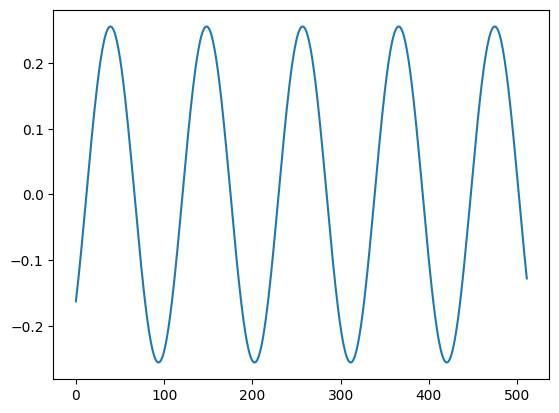

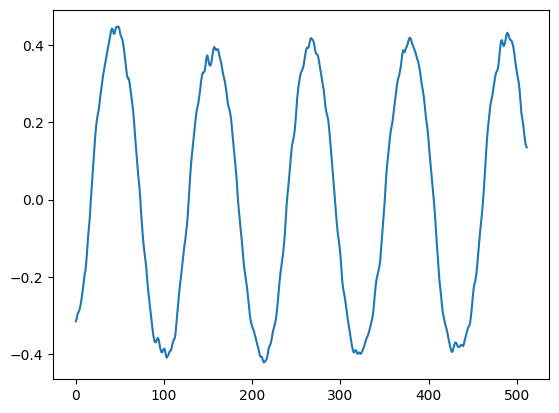

In [11]:
import matplotlib.pyplot as plt

idx = 10

plt.plot((batch).cpu().detach()[idx])
plt.show()
plt.plot((pred_batch).cpu().detach()[idx])
plt.show()

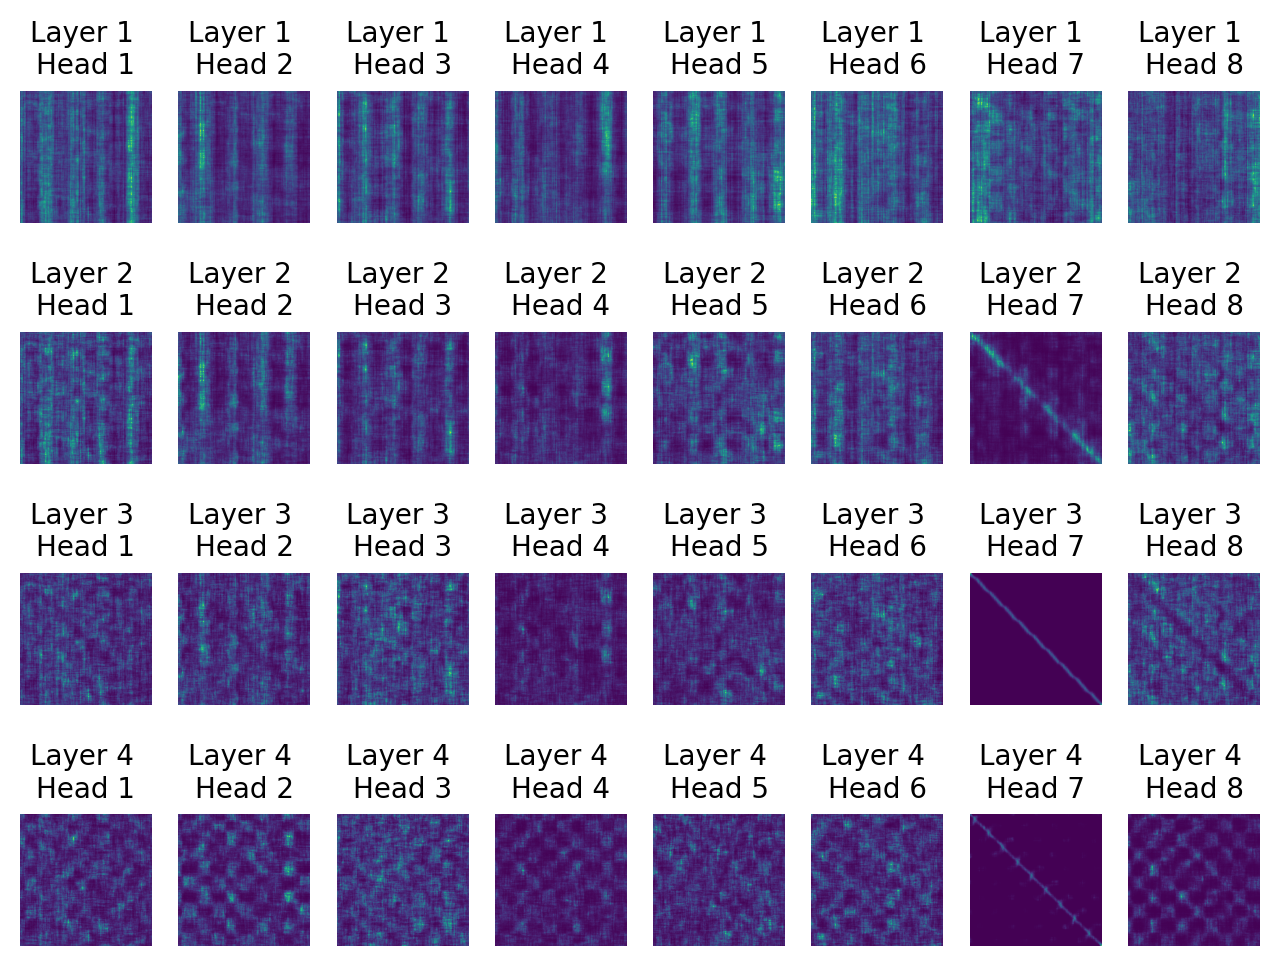

In [12]:
plot_attention_weights(layer_attn_weights.cpu().detach().numpy(), 10)